<p style='color:red;font-size:20px'><b><u>Problem statement: Predict the percentage of the student based on the number of study hours </u> </b></p>
<p style='color:black;font-size:15px'><b>Machine Learnig model used : Linear Regression </b></p>
<p style='color:black;font-size:15px'><b>Author:</b> Rahul Abhishek</p>

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<function matplotlib.pyplot.show(close=None, block=None)>

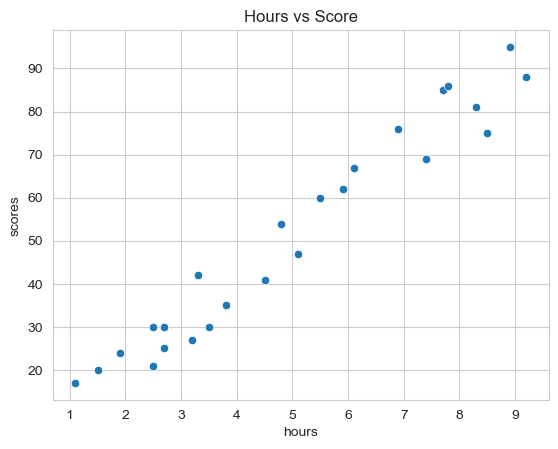

In [7]:
# plotting data set inorder to understand the underlying trend in the data set 
sns.set_style('whitegrid')
sns.scatterplot(x=s_data['Hours'],y=s_data['Scores'],data=s_data,marker= 'o')
plt.title('Hours vs Score')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show

<p style='color:blue'><b>from the above plot it is quite clear that as we increase study hours score obtained by student also increases so we can say there is a strong linear relationship between number of hours studied and score obtained</b></p> 

<p style='font-size:20px;color:green'><b>SPLITTING DATA SET INTO TRAIN AND TEST  </b></p>

In [19]:
x=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values

In [20]:
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=0)

<p style = 'font-size:20px;color:green'> Preparing model </p>

In [25]:
#importing necessary lib 
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

<p style = 'font-size:20px;color:green'> Plotting regression line  </p>

<Axes: >

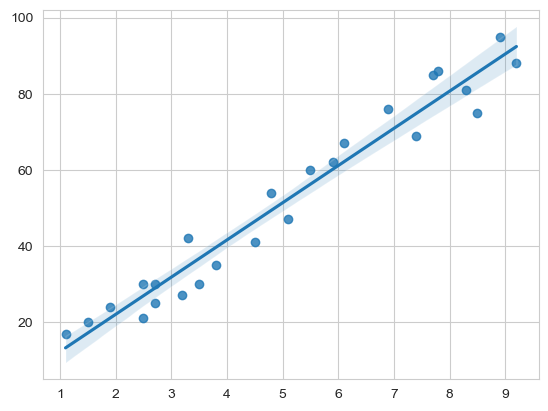

In [27]:
sns.regplot(x=x,y=y) # plotting linear regression line for the data which we prepared


<p style = 'font-size:20px;color:green'> prediction   </p>

In [28]:
y_pred = regression_model.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


<p style = 'font-size:20px;color:green'> preparing data frame of actual and predicted data set  </p>

In [29]:
df =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<p style = 'font-size:20px;color:green'> prediction at any arbittary time let say hours = 7.2 hours  </p>

In [33]:
h = 5
reshaped_h = np.array(h).reshape(-1, 1)
new_pred = regression_model.predict(reshaped_h)
print(new_pred)

[51.31364882]


In [38]:
print(f"number of hours studied: {h}\
 total score obtained : {new_pred}")

number of hours studied: 5 total score obtained : [51.31364882]


<p style = 'font-size:20px;color:green'> model evalution   </p>

In [40]:
from sklearn.metrics import mean_absolute_error
model_perf = mean_absolute_error(y_test,y_pred)
print(f" performance of the model in terms of mean_absolute_error is : {model_perf}")

 performance of the model in terms of mean_absolute_error is : 4.419727808027652


In [41]:
from sklearn.metrics import r2_score
rscore = r2_score(y_test,y_pred)
print(f" performance of model in terms of r2 score : {rscore}")

 performance of model in terms of r2 score : 0.9568211104435257


<p style='color:blue'><b>from above metrics it is very clear that the performance of model is satisfactory as we have r2 score very close to 1 i.e 0.96 which is quite good number </b></p> 